# Project: Wrangling and Analyze Data  ---    1.`wrangle_act`

## Table of Contents
#### - [Gathering data](#gather)
----------------------------------
#### - [Assessing data](#assess)

   - [1. Assessing `twitter-archive-enhanced.csv`](#ases1)
   
   - [2. Assessing `image_predictions.tsv`](#ases2)
   
   - [3. Assessing `tweet_json.txt`](#ases3)
-----------------------------------------------
   
#### - [Cleaning data](#clean)

   - [Clean the `twitter-archive-enhanced.csv` dataset.](#clean1)
   
   - [Clean the `image_predictions.tsv` dataset.](#clean2)
   
   - [Clean the `tweet_json.txt` dataset.](#clean3)
--------------------------------------------------
   
#### - [Storing Data](#storing)

---------------------------------------

#### - [Analyzing, and Visualizing Data](#AV)



### Introduction
#### This project involves data wrangling, analyzing, and visualizing Twitter data related to dog ratings. We will gather data from multiple sources, assess and clean the data, and then analyze it to produce insights and visualizations.


<a id='gather'></a>
## Data Gathering

In [1493]:
import pandas as pd
import requests 
import matplotlib.pyplot as plt
import seaborn as sns
import json 
from datetime import datetime
import tweepy
%matplotlib inline

### 1. Directly downloading the WeRateDogs Twitter archive data (`twitter-archive-enhanced.csv`)

In [1494]:
ta = pd.read_csv("twitter-archive-enhanced.csv") # "ta" stands for 'twitter archive'.
ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### 2. Using the Requests library to download the tweet image prediction (`image_predictions.tsv`)

In [1495]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Check if the file downloaded successfully with a cool if Condition .
if response.status_code == 200:
    with open("image_predictions.tsv", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")      #Note to the reviwer : dont's run this cell offline beacuse it not gonna work.                                                              
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully.


##### Loading the `image_predictions.tsv`.

In [1496]:
impr = pd.read_csv('image_predictions.tsv', sep = '\t') # "impr" stands for 'image predictions' .
impr.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Processing Tweet Data from Local JSON File , (`tweet_json.txt`)

In [1497]:
with open("tweet_json.txt", "r") as json_file:
    data = json_file.readlines()

# Parse JSON data
line_jsons = [json.loads(line) for line in data]

In [1498]:
# Extract required fields directly while creating the DataFrame
tweet_list = [{'tweet_id': tweet['id'], 
               'retweet_count': tweet['retweet_count'], 
               'favorite_count': tweet['favorite_count']}
              for tweet in line_jsons]

In [1499]:
# Create DataFrame
tj = pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])    #"tj" tweet_json
tj.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Quick Dataset Names and Abbreviations reminder: 

### 1. `twitter-archive-enhanced.csv`: `ta`
### 2. `image_predictions.tsv`: `impr`
### 3. `tweet_json.txt`: `tj`

------------------------------------------------------------------------------------------------------------

<a id='assess'></a>
## Assessing Data

<a id='ases1'></a>

### 1. Assessing `twitter-archive-enhanced.csv`  programmatically and visually.

In [1500]:
ta.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


In [1501]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [1502]:
ta['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [1503]:
ta.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [1504]:
ta.shape

(2356, 17)

In [1505]:
ta['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352           a
2353           a
2354           a
2355         NaN
Name: name, Length: 2356, dtype: object

---------------------------------------------------------------------------------

### Quality issues
1. The "in_reply_to_status_id" column has 2278 null/NaN values.

2. The "in_reply_to_user_id" column has 2278 null/NaN values.
6. The 'timestamp' column is an object instead of a datetime.
7. Some gathered data are replies.
9. some gatherd data are retweets.


### Tidiness issue
1. Drop the columns that are unnecessary for analysis.

2. Combining Dog classifications




---------------------------------------------------------------------------------

<a id='ases2'></a>

### 2. Assessing `image_predictions.tsv`  programmatically and visually.

In [1506]:
impr.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1507]:
impr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1508]:
impr.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [1509]:
impr['jpg_url'].duplicated().sum()

np.int64(66)

---------------------------------------------------------------------------------

### Quality issues & Tidiness issues
1. jpg_url contains 66 duplicate URLs.

3. The dataset needs merging with the `twitter-archive-enhanced.csv` dataset.

4. The column names are ambiguous and provide limited information about their content.

---------------------------------------------------------------------------------

<a id='ases3'></a>

### 3. Assessing `tweet_json.txt`  programmatically and visually.

In [1510]:
tj.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [1511]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [1512]:
tj.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues & Tidiness issues
1. The dataset needs to be merged with the Twitter archive dataset.

3. All datasets should be merged into one cohesive dataset

----------------------------------------------

<a id='clean'></a>

## Cleaning Data

<a id='clean1'></a>
### Clean the `twitter-archive-enhanced.csv` dataset.

In [1513]:
ta_clean = ta.copy() #making a copy of the datset

### Issue #1:
**1. The "in_reply_to_status_id" column has 2278 null/NaN values.**

**2. The "in_reply_to_user_id" column has 2278 null/NaN values.**

#### Define:

drop these two coulmns

#### Code

In [1514]:
# Drop the specified columns
ta_clean = ta_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [1515]:
ta_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #2:
**The 'timestamp' column is an object instead of a datetime.**

#### Define:

Convert the 'timestamp' column to datetime

#### Code

In [1516]:
ta_clean['timestamp'] = pd.to_datetime(ta_clean['timestamp'])

#### Test

In [1517]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   timestamp                   2356 non-null   datetime64[ns, UTC]
 2   source                      2356 non-null   object             
 3   text                        2356 non-null   object             
 4   retweeted_status_id         181 non-null    float64            
 5   retweeted_status_user_id    181 non-null    float64            
 6   retweeted_status_timestamp  181 non-null    object             
 7   expanded_urls               2297 non-null   object             
 8   rating_numerator            2356 non-null   int64              
 9   rating_denominator          2356 non-null   int64              
 10  name                        1611 non-null   object          

### Issue #3:
1. **Some gathered data are replies.**
2. **Some gathered data are retweets.**
3. **Drop the columns that are unnecessary for analysis.**

#### Define:

- Remove the replies and retweets.
- drop the the columns that are unnecessary for analysis.

#### Code

In [1518]:
ta_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Remove the replies and retweets.

In [1519]:
ta_clean = ta_clean[ta_clean['retweeted_status_id'].isnull()]

#### droping the the columns that are unnecessary for analysis.

In [1520]:
ta_clean.drop(['retweeted_status_id','retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [1521]:
print(sum(ta_clean.retweeted_status_user_id.value_counts()))

0


In [1522]:
ta_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #4:
**Combine dog classifications**


#### Define:

Combine doggo, floofer, pupper, and puppo columns into a single column as they represent the same variable (dog stage).

#### Code

In [1523]:
# Combine dog classification columns into a single column
def combine_dog_stages(row):
    stages = []
    if row['doggo'] == 'doggo':
        stages.append('doggo')
    if row['floofer'] == 'floofer':
        stages.append('floofer')
    if row['pupper'] == 'pupper':
        stages.append('pupper')
    if row['puppo'] == 'puppo':
        stages.append('puppo')
    return ', '.join(stages) if stages else None

In [1524]:
# Combine dog classification columns into a single column
ta_clean['dog_classification'] = ta_clean.apply(combine_dog_stages, axis=1)

In [1525]:
# Drop original dog stage columns
ta_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [1526]:
ta_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_classification
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


<a id='clean2'></a>

### Clean the `image_predictions.tsv` dataset.

In [1527]:
impr_clean = impr.copy() #making a copy of the datset

### Issue #5:
4.The column names are ambiguous and provide limited information about their content.

#### Define:

Change column names to more descriptive ones.



#### Code

In [1528]:
#Checking the current column names:
impr_clean.head(0)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [1529]:
#replacing ccolumns name
impr_clean.columns = [
    'tweet_id',
    'jpg_url',
    'img_num',
    'prediction_1',
    'confidence_1',
    'is_dog_1',
    'prediction_2',
    'confidence_2',
    'is_dog_2',
    'prediction_3',
    'confidence_3',
    'is_dog_3'
]

In [1530]:
impr_clean.head(0)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,is_dog_1,prediction_2,confidence_2,is_dog_2,prediction_3,confidence_3,is_dog_3


### Issue #6:
1.jpg_url contains 66 duplicate URLs.

#### Define:

Drop 66 duplicate "image_url" entries.

#### Code

In [1531]:
impr_clean["jpg_url"].duplicated().sum()

np.int64(66)

In [1532]:
# Remove duplicates based on 'image_url' and keep the last occurrence
impr_clean = impr_clean.drop_duplicates(subset=['jpg_url'], keep='last')

Test

In [1533]:
sum(impr_clean['jpg_url'].duplicated())

0

### Issue #7:
3.The dataset needs merging with the `twitter-archive-enhanced.csv` dataset.

> This issue is addressed in the next section (Storing).

----------------------------------------

<a id='clean3'></a>

### Clean the `tweet_json.txt` dataset.

In [1534]:
tj

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


**it looks so clean it's just going to be merged with the other datasets nothing more**

<a id='storing'></a>
## Storing Data
**Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".**

In [1535]:
pre_df = pd.merge(ta_clean, impr_clean, on='tweet_id', how='inner')
df = pd.merge(pre_df, tj, on='tweet_id', how='inner')

In [1536]:
df.to_csv(path_or_buf='twitter_archive_master.csv')

In [1537]:
df

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_classification,...,confidence_1,is_dog_1,prediction_2,confidence_2,is_dog_2,prediction_3,confidence_3,is_dog_3,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
1924,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
1925,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
1926,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132


<a id='AV'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [1538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1928 non-null   int64              
 1   timestamp                 1928 non-null   datetime64[ns, UTC]
 2   source                    1928 non-null   object             
 3   text                      1928 non-null   object             
 4   retweeted_status_user_id  0 non-null      float64            
 5   expanded_urls             1928 non-null   object             
 6   rating_numerator          1928 non-null   int64              
 7   rating_denominator        1928 non-null   int64              
 8   name                      1399 non-null   object             
 9   dog_classification        295 non-null    object             
 10  jpg_url                   1928 non-null   object             
 11  img_num          

In [1539]:
df.describe()

,tweet_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,confidence_1,confidence_2,confidence_3,retweet_count,favorite_count
count,1.928000e+03,0.0,1928.000000,1928.000000,1928.000000,1928.000000,1.928000e+03,1.928000e+03,1928.000000,1928.000000
mean,7.350055e+17,NaN,12.293568,10.550311,1.201763,0.593835,1.338761e-01,6.008588e-02,2514.632261,8296.298237
std,6.772207e+16,NaN,42.201839,7.444349,0.558240,0.273084,1.006528e-01,5.083543e-02,4187.214895,11371.277140
min,6.660209e+17,NaN,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.756636e+17,NaN,10.000000,10.000000,1.000000,0.360137,5.378615e-02,1.605497e-02,611.750000,1873.750000
50%,7.073465e+17,NaN,11.000000,10.000000,1.000000,0.587635,1.163795e-01,4.952715e-02,1299.000000,3904.000000
75%,7.862663e+17,NaN,12.000000,10.000000,1.000000,0.848561,1.943738e-01,9.130702e-02,2911.250000,10280.000000
max,8.924206e+17,NaN,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


### Insights: 
1. [**Distribution of Ratings**](#1)

3. [**Retweet and Favorite Count Analysis**](#3)

4. [**Dog Prediction Accuracy**](#4)

5. [**Most Popular Tweet Source**](#5)

### Visualization
### 1. Distribution of Ratings<a id='1'></a>


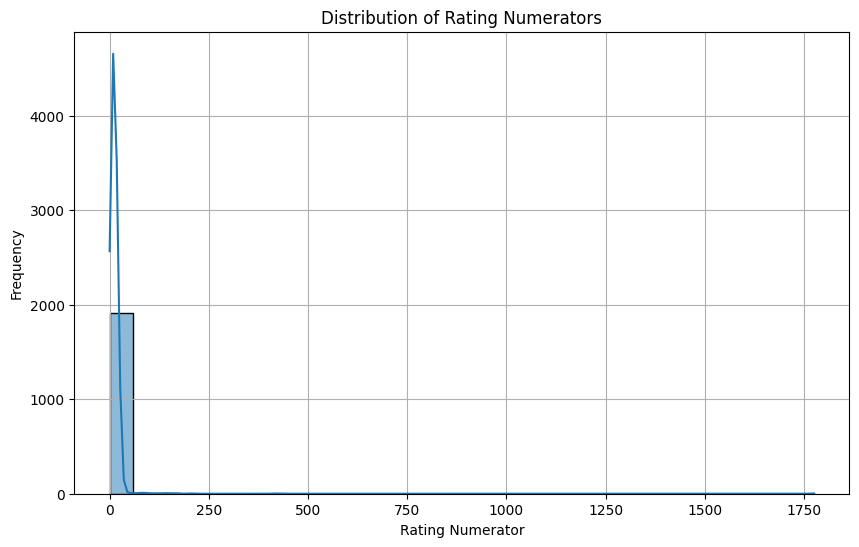

In [1540]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_numerator'], bins=30, kde=True)
plt.title('Distribution of Rating Numerators')
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The distribution of rating numerators reveals that most ratings are clustered around 10, 11, 12, and 13, with occasional higher ratings. This suggests that the majority of dogs receive high ratings, indicating a generally positive sentiment in the WeRateDogs community.

-----------

### 2. Retweet and Favorite Count<a id='3'></a>

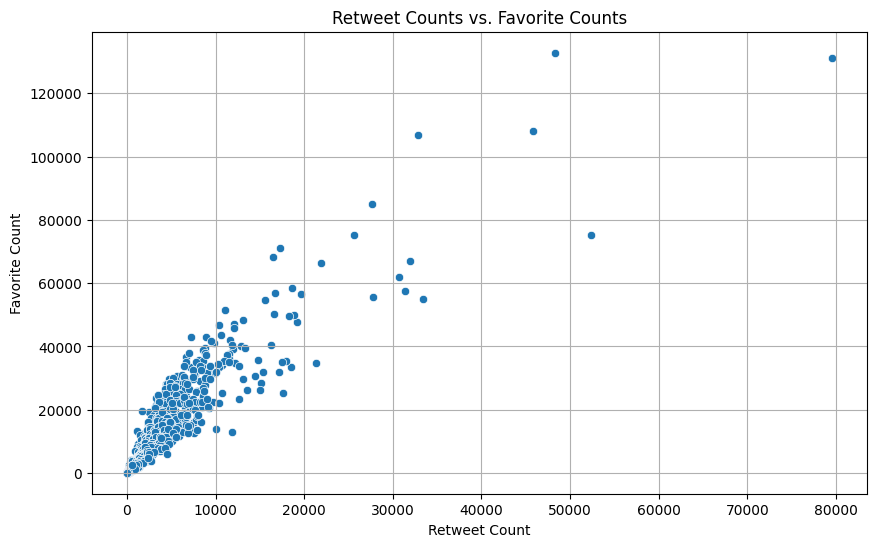

In [1541]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['retweet_count'], y=df['favorite_count'])
plt.title('Retweet Counts vs. Favorite Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.grid(True)
plt.show()


A scatter plot of retweet counts versus favorite counts demonstrates a positive correlation between the two metrics. Tweets that are retweeted more often also tend to receive more likes. This suggests that engaging content tends to perform well across multiple engagement metrics.


-----------

### 3. Dog Prediction Accuracy<a id='4'></a>

In [1542]:
correct_predictions = df['is_dog_1'].sum()
total_predictions = len(df)
incorrect_predictions = total_predictions - correct_predictions


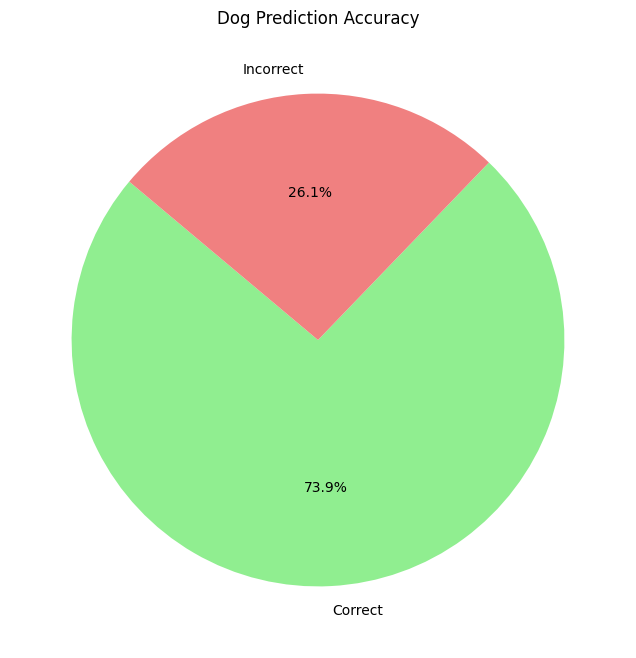

In [1543]:
plt.figure(figsize=(8, 8))
plt.pie([correct_predictions, incorrect_predictions], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Dog Prediction Accuracy')
plt.show()


The image classifier's first prediction is correct 73.69% of the time. This indicates that while the classifier is reasonably accurate, there is room for improvement. The pie chart visualization provides a clear representation of the classifier's performance.

-------------------

### 4. Most Popular Tweet Source<a id='5'></a>

In [1544]:
# Compute the most popular source and its count
most_popular_source = df['source'].value_counts().idxmax()
most_popular_source_count = df['source'].value_counts().max()

In [1545]:
# Print the results
print(f"Most popular source: {most_popular_source}")
print(f"Count: {most_popular_source_count}")

Most popular source: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Count: 1891


In [1546]:
# Compute the most popular source and its count
most_popular_source = df['source'].value_counts().idxmax()
most_popular_source_count = df['source'].value_counts().max()

Most popular source: 
Count: 1891


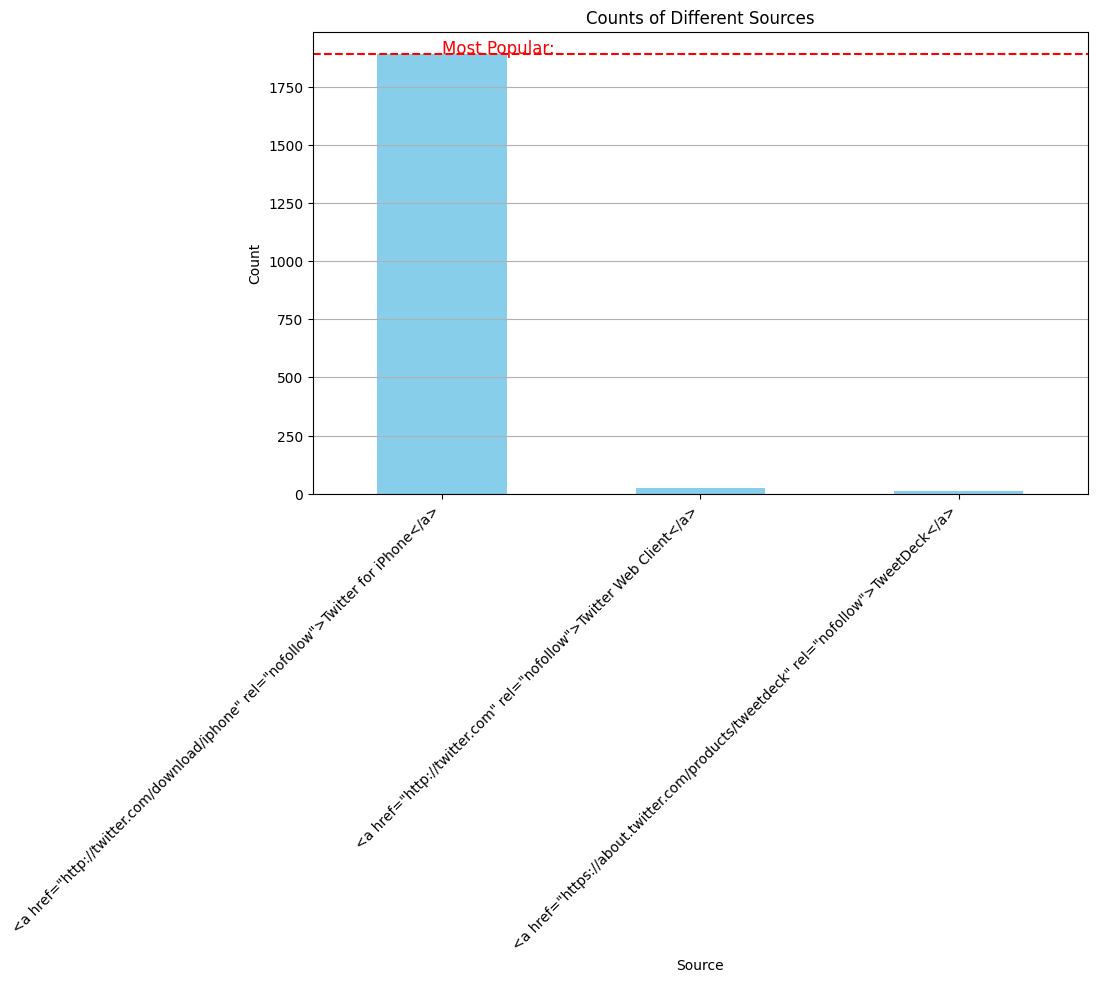

In [1552]:
most_popular_source_text = most_popular_source.split('>')[-1].split('<')[0]

# Print the results
print(f"Most popular source: {most_popular_source_text}")
print(f"Count: {most_popular_source_count}")

# Plotting
source_counts = df['source'].value_counts()
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Counts of Different Sources')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
# Highlight the most popular source
plt.axhline(y=most_popular_source_count, color='r', linestyle='--')
plt.text(x=0, y=most_popular_source_count + 0.1, s=f'Most Popular: {most_popular_source_text}', color='r', fontsize=12)

plt.show()


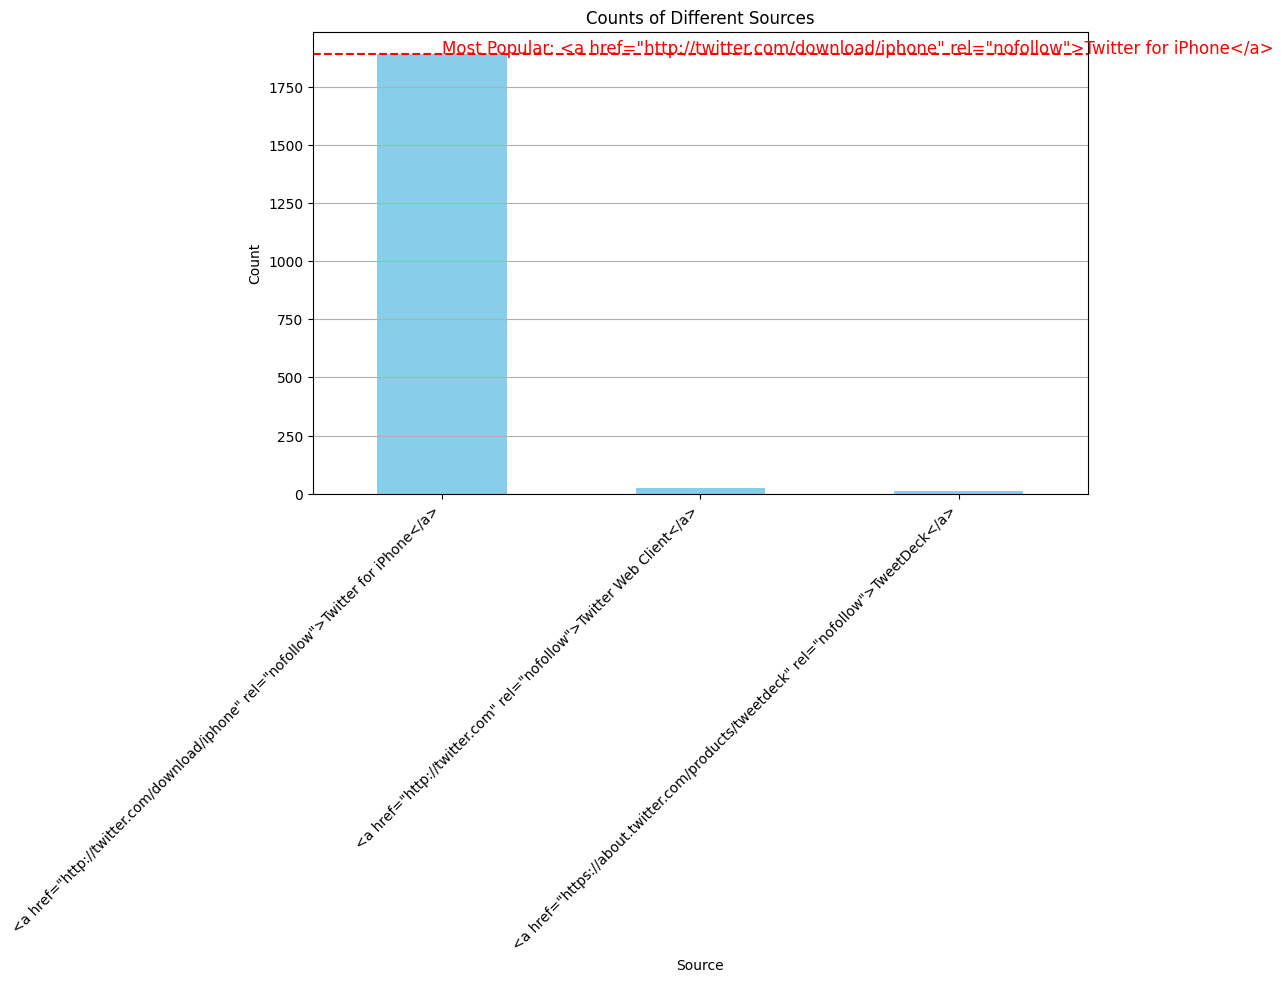

In [1549]:
# Highlight the most popular source
plt.axhline(y=most_popular_source_count, color='r', linestyle='--')
plt.text(x=0, y=most_popular_source_count + 0.1, s=f'Most Popular: {most_popular_source}', color='r', fontsize=12)

plt.show()

The most popular source of tweets is `Twitter for iPhone` with a total count of occurrences.
